In [2]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

In [3]:
import pandas as pd

from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np


# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [4]:
df = pd.read_csv("liedetector.csv")

In [5]:
df.shape

(1372, 6)

In [6]:
df.head(50)

X1        X2        X3       X4        X5  X6
0   P_001  3.621600   8.66610 -2.80730 -0.446990   0
1   P_002  4.545900   8.16740 -2.45860 -1.462100   0
2   P_003  3.866000  -2.63830  1.92420  0.106450   0
3   P_004  3.456600   9.52280 -4.01120 -3.594400   0
4   P_005  0.232300  -4.45520  4.57180 -0.988800   0
5   P_006  4.368400   9.67180 -3.96060 -3.162500   0
6   P_007  3.591200   3.01290  0.72888  0.564210   0
7   P_008  2.092200  -6.81000  8.46360 -0.602160   0
8   P_009  3.203200   5.75880 -0.75345 -0.612510   0
9   P_010  1.535600   9.17720 -2.27180 -0.735350   0
10  P_011  1.224700   8.77790 -2.21350 -0.806470   0
11  P_012  3.989900  -2.70660  2.39460  0.862910   0
12  P_013  1.899300   7.66250  0.15394 -3.110800   0
13  P_014 -1.576800  10.84300  2.54620 -2.936200   0
14  P_015  3.404000   8.72610 -2.99150 -0.572420   0
15  P_016  4.676500  -3.38950  3.48960  1.477100   0
16  P_017  2.671900   3.06460  0.37158  0.586190   0
17  P_018  0.803550   2.84730  4.34390  0.601700   0
18  P_019  1.447900  -4.87940  8.34280 -2.108600   0
19  P_020  5.242300  11.02720 -4.35300 -4.101300   0
20  P_021  5.786700   7.89020 -2.61960 -0.487080   0
21  P_022  0.329200  -4.45520  4.57180 -0.988800   1
22  P_023  3.936200  10.16220 -3.82350 -4.017200   0
23  P_024  0.935840   8.88550 -1.68310 -1.659900   1
24  P_025  4.433800   9.88700 -4.67950 -3.748300   0
25  P_026  0.705700  -5.49810  8.33680 -2.871500   0
26  P_027  1.143200  -3.74130  5.57770 -0.635780   0
27  P_028 -0.382140   8.39090  2.16240 -3.740500   0
28  P_029  6.563300   9.81870 -4.41130 -3.225800   0
29  P_030  4.890600  -3.35840  3.42020  1.090500   0
30  P_031 -0.248110  -0.17797  4.90680  0.154290   1
31  P_032  1.488400   3.62740  3.30800  0.489210   1
32  P_033  4.296900   7.61700 -2.38740 -0.961640   0
33  P_034 -0.965110   9.41110  1.73050 -4.862900   0
34  P_035 -1.616200   0.80908  8.16280  0.608170   0
35  P_036  2.439100   6.44170 -0.80743 -0.691390   0
36  P_037  2.688100   6.01950 -0.46641 -0.692680   0
37  P_038  3.628900   0.81322  1.62770  0.776270   0
38  P_039  4.567900   3.19290 -2.10550  0.296530   0
39  P_040  3.480500   9.70080 -3.75410 -3.437900   0
40  P_041  4.171100   8.72200 -3.02240 -0.596990   1
41  P_042 -0.206200   9.22070 -3.70440 -6.810300   0
42  P_043 -0.006892   9.29310 -0.41243 -1.963800   0
43  P_044  0.964410   5.83950  2.32350  0.066365   0
44  P_045  2.856100   6.91760 -0.79372  0.484030   1
45  P_046 -0.786900   9.56630 -3.78670 -7.503400   0
46  P_047  2.084300   6.62580  0.48382 -2.213400   0
47  P_048 -0.786900   9.56630 -3.78670 -7.503400   0
48  P_049  3.910200   6.06500 -2.45340 -0.682340   0
49  P_050  1.634900   3.28600  2.87530  0.087054   1

In [7]:
df.describe().transpose()

count      mean       std      min       25%      50%       75%      max
X2  1372.0  0.433665  2.842766  -7.0421 -1.773000  0.49618  2.821475   6.8248
X3  1372.0  1.922353  5.869047 -13.7731 -1.708200  2.31965  6.814625  12.9516
X4  1372.0  1.397627  4.310030  -5.2861 -1.574975  0.61663  3.179250  17.9274
X5  1372.0 -1.191657  2.101013  -8.5482 -2.413450 -0.58665  0.394810   2.4495
X6  1372.0  0.406706  0.491398   0.0000  0.000000  0.00000  1.000000   1.0000

In [9]:
df1= df.drop('X1', axis=1)

In [10]:
df1

X2        X3       X4       X5  X6
0     3.62160   8.66610  -2.8073 -0.44699   0
1     4.54590   8.16740  -2.4586 -1.46210   0
2     3.86600  -2.63830   1.9242  0.10645   0
3     3.45660   9.52280  -4.0112 -3.59440   0
4     0.23230  -4.45520   4.5718 -0.98880   0
...       ...       ...      ...      ...  ..
1367  0.40614   1.34920  -1.4501 -0.55949   0
1368 -1.38870  -4.87730   6.4774  0.34179   0
1369 -3.75030 -13.45860  17.5932 -2.77710   0
1370 -3.56370  -8.38270  12.3930 -1.28230   0
1371 -2.54190  -0.65804   2.6842  1.19520   0

[1372 rows x 5 columns]

In [11]:
df1.groupby(["X6"]).count()

X2   X3   X4   X5
X6                    
0   814  814  814  814
1   558  558  558  558

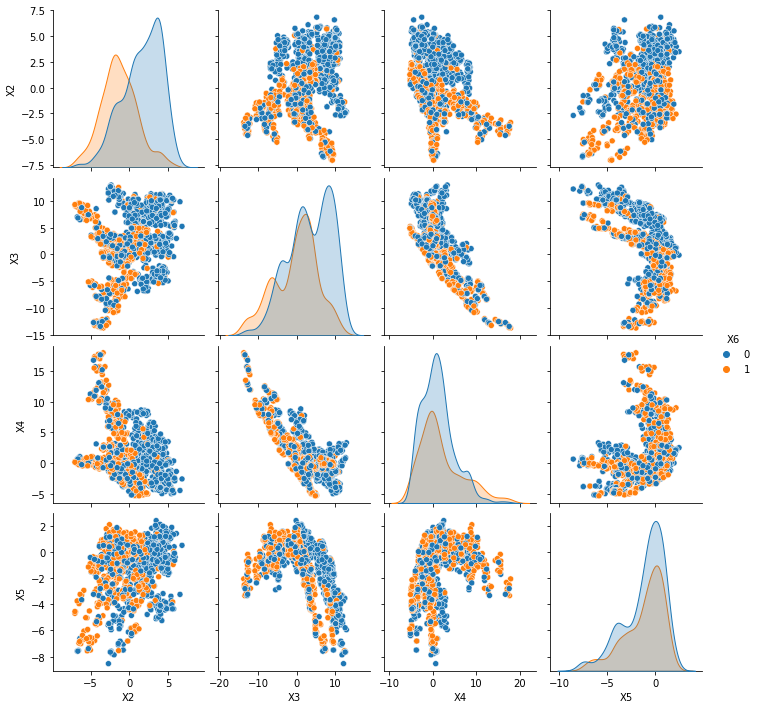

In [12]:
sns.pairplot(df1, hue='X6' , diag_kind = 'kde')

In [13]:
array = df1.values
X = array[:,0:3] # select all rows and first 8 columns which are the attributes
Y = array[:,4]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties

In [14]:
# Fit the model on original data i.e. before upsampling
model = LogisticRegression()

In [16]:
model.fit(X, Y)

LogisticRegression()

In [17]:
y_predict = model.predict(X)
model_score = model.score(X, Y)
print(model_score)
print(metrics.confusion_matrix(Y, y_predict))
print(metrics.classification_report(Y, y_predict))

0.8483965014577259
[[681 133]
 [ 75 483]]
              precision    recall  f1-score   support

         0.0       0.90      0.84      0.87       814
         1.0       0.78      0.87      0.82       558

    accuracy                           0.85      1372
   macro avg       0.84      0.85      0.85      1372
weighted avg       0.85      0.85      0.85      1372



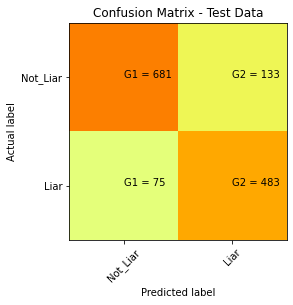

In [19]:
cm = metrics.confusion_matrix(Y, y_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Not_Liar', 'Liar']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['G1', 'G2'], ['G1','G2']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [20]:
df1.X6.value_counts()

0    814
1    558
Name: X6, dtype: int64

In [21]:
round(df1.X6.value_counts(1),2)

0    0.59
1    0.41
Name: X6, dtype: float64

In [25]:
df1.X5.value_counts()

-0.295700    5
-0.988800    5
-0.237510    4
-7.503400    4
 0.361190    4
            ..
-5.064600    1
 0.008175    1
-2.160300    1
 0.027572    1
 1.187500    1
Name: X5, Length: 1156, dtype: int64

<ipython-input-27-0e3cee7d9f91>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df1.iloc[:,0:4].hist(ax = ax)


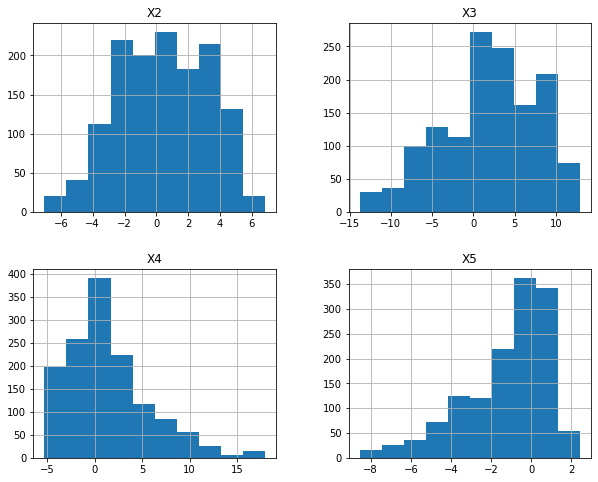

In [27]:
# Histogram of a few select variables
fig = plt.figure(figsize = (10,8))
ax = fig.gca()
df1.iloc[:,0:4].hist(ax = ax)
plt.show()

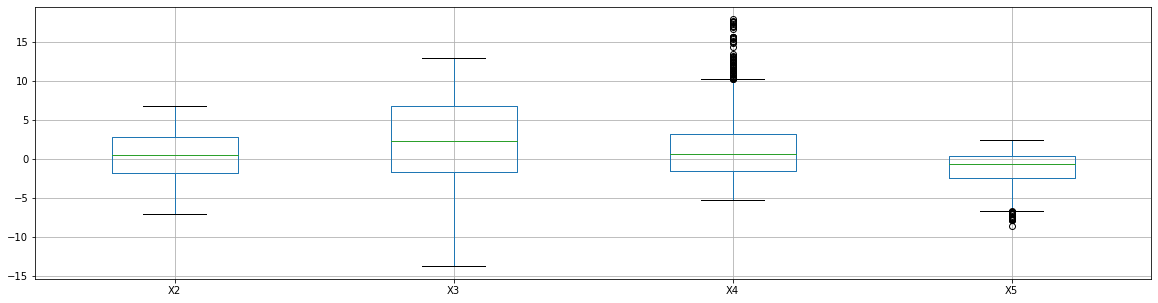

In [29]:
df1.iloc[:,0:4].boxplot(figsize = (20,5))
plt.show()

In [31]:
df1.groupby(['X6','X2'])['X4'].count().unstack()

X2  -7.0421  -7.0364  -6.9599  -6.7526  -6.7387  -6.6510  -6.5773  -6.5235  \
X6                                                                           
0       NaN      NaN      NaN      NaN      1.0      1.0      1.0      NaN   
1       1.0      1.0      1.0      1.0      NaN      NaN      NaN      1.0   

X2  -6.5084  -6.4247  ...   5.7823   5.7867   5.8070   5.8519   5.8782  \
X6                    ...                                                
0       NaN      NaN  ...      1.0      1.0      1.0      1.0      1.0   
1       1.0      1.0  ...      NaN      NaN      NaN      NaN      NaN   

X2   5.8862   5.9374   6.0919   6.5633   6.8248  
X6                                               
0       1.0      1.0      1.0      1.0      1.0  
1       NaN      NaN      NaN      NaN      NaN  

[2 rows x 1338 columns]

In [34]:
round(df1.groupby(['X6'])['X2'].value_counts(1),2).unstack()

X2  -7.0421  -7.0364  -6.9599  -6.7526  -6.7387  -6.6510  -6.5773  -6.5235  \
X6                                                                           
0       NaN      NaN      NaN      NaN      0.0      0.0      0.0      NaN   
1       0.0      0.0      0.0      0.0      NaN      NaN      NaN      0.0   

X2  -6.5084  -6.4247  ...   5.7823   5.7867   5.8070   5.8519   5.8782  \
X6                    ...                                                
0       NaN      NaN  ...      0.0      0.0      0.0      0.0      0.0   
1       0.0      0.0  ...      NaN      NaN      NaN      NaN      NaN   

X2   5.8862   5.9374   6.0919   6.5633   6.8248  
X6                                               
0       0.0      0.0      0.0      0.0      0.0  
1       NaN      NaN      NaN      NaN      NaN  

[2 rows x 1338 columns]

In [35]:
import statsmodels.formula.api as sm

In [36]:
X=pd.get_dummies(df1.X2,drop_first=True)
y=np.asarray(df1.X6)

In [37]:
glm = sm.logit('X6~X2',data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.533699
         Iterations 6


In [38]:
print(glm.summary())

                           Logit Regression Results                           
Dep. Variable:                     X6   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                  0.2101
Time:                        11:48:34   Log-Likelihood:                -732.23
converged:                       True   LL-Null:                       -926.97
Covariance Type:            nonrobust   LLR p-value:                 1.075e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3031      0.064     -4.742      0.000      -0.428      -0.178
X2            -0.4544      0.027    -16.651      0.000      -0.508      -0.401


In [46]:
#X6
np.exp(-0.3031)/(1+np.exp(-0.30319))

0.4248160787032962

In [49]:
#X2
np.exp(-0.4544)/(1+np.exp(-0.4544))

0.3883151373393785

In [51]:
#X2
np.exp(-0.3031+-0.4544)/(1+np.exp(-0.3031+-0.4544))

0.31918928918436135

In [56]:
#X2
np.exp(-0.3031+-0.4544*3.62)/(1+np.exp(-0.3031+-0.4544*3.62))

0.12476854396045922

In [57]:
#X2
np.exp(-0.3031+-0.4544*4.62)/(1+np.exp(-0.3031+-0.4544*4.62))

0.08298773663694997

In [60]:
# As variance of responses increases, the probability of being a liar decreases

In [65]:
# Odds of being a liar for a given level of variance
# as variance decreases, odds increase, as variance increases, odds decrease
np.exp(-0.3031+-0.4544 * 4.62)

0.0904979572820551

In [66]:
# for 1 unit increase in variance, odds of being liar change by
np.exp(-0.4544)

0.6348287509524749

In [44]:
glm1 = sm.logit('X6~X3',data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.628628
         Iterations 5


In [45]:
print(glm1.summary())

                           Logit Regression Results                           
Dep. Variable:                     X6   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                 0.06958
Time:                        11:58:34   Log-Likelihood:                -862.48
converged:                       True   LL-Null:                       -926.97
Covariance Type:            nonrobust   LLR p-value:                 6.808e-30
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1934      0.060     -3.244      0.001      -0.310      -0.077
X3            -0.1117      0.010    -10.749      0.000      -0.132      -0.091


In [58]:
#X3
np.exp(-0.1117)/(1+np.exp(-0.1117))

0.4721039985820963

In [59]:
#X3
np.exp(-0.1934+-0.1117)/(1+np.exp(-0.1934+-0.1117))

0.42431122165170043

In [55]:
#X3
np.exp(-0.1934+-0.1117*8.66)/(1+np.exp(-0.1934+-0.1117*8.66))

0.23853611874838235

In [ ]:
# as skewness of responses increases, the probability of the prisoner's being a liar decreases 

In [71]:
# Odds of being a liar for a given level of skewness
# as skewness decreases, odds increase, as skewness increases, odds decrease
np.exp(-0.1934+-0.1117 * 9.66)

0.28015227061678344

In [72]:
# for 1 unit increase in skewness, odds of being liar change by
np.exp(-0.1117)

0.8943125110136224

In [73]:
glm2 = sm.logit('X6~X4',data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.671090
         Iterations 4


In [74]:
print(glm2.summary())

                           Logit Regression Results                           
Dep. Variable:                     X6   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                0.006731
Time:                        12:57:56   Log-Likelihood:                -920.73
converged:                       True   LL-Null:                       -926.97
Covariance Type:            nonrobust   LLR p-value:                 0.0004117
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4432      0.058     -7.579      0.000      -0.558      -0.329
X4             0.0449      0.013      3.521      0.000       0.020       0.070


In [75]:
#X4
np.exp(0.0449)/(1+np.exp(0.0449))

0.5112231145707494

In [76]:
#X4
np.exp(-0.4432+-0.0449)/(1+np.exp(-0.4432+-0.0449))

0.380341261132203

In [79]:
#X4
np.exp(-0.4432+-0.0449*4.34)/(1+np.exp(-0.4432+-0.0449*4.34))

0.34568385348517866

In [80]:
# as kurtosis of responses, increases, the probabitlity of being a liar decreases

In [95]:
# Odds of being a liar for a given level of kurtosis
# as kurtosis decreases, odds increase, as kurtosis increases, odds decrease
np.exp(-0.4432+-0.0449*4.34)

0.5283131943578719

In [84]:
# for 1 unit increase in skewness, odds of being liar change by
np.exp(0.0449)

1.045923262352691

In [85]:
glm3 = sm.logit('X6~X5',data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.675592
         Iterations 4


In [87]:
print(glm3.summary())

                           Logit Regression Results                           
Dep. Variable:                     X6   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1370
Method:                           MLE   Df Model:                            1
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:               6.649e-05
Time:                        13:08:44   Log-Likelihood:                -926.91
converged:                       True   LL-Null:                       -926.97
Covariance Type:            nonrobust   LLR p-value:                    0.7255
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3886      0.063     -6.142      0.000      -0.513      -0.265
X5            -0.0092      0.026     -0.351      0.725      -0.060       0.042


In [88]:
# X5
np.exp(-0.0092)/(1+np.exp(-0.0092))

0.49770001622252935

In [89]:
#X5
np.exp(-0.3886+-0.0092)/(1+np.exp(-0.3886+-0.0092))

0.40184102809994754

In [91]:
#X5
np.exp(-0.3886+-0.0092*2.19)/(1+np.exp(-0.3886+-0.0092*2.19))

0.3992123652253274

In [ ]:
# as entropy of responses increases, the probability of being a liar decreases

In [94]:
# Odds of being a liar for a given level of skewness
# as entropy decreases, odds increase, as entropy increases, odds decrease
np.exp(-0.3886+-0.0092*3.19)

0.6583964641508264

In [96]:
# for 1 unit increase in entropy, odds of being liar change by
np.exp(-0.0092)

0.9908421905166154

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


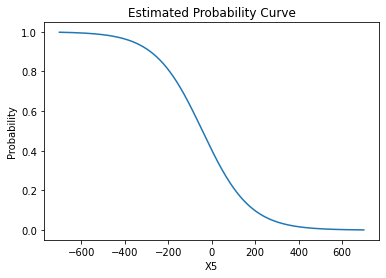

In [105]:
newvalue=np.arange(-700,700)
newdata=pd.DataFrame(newvalue,columns=['X5'])
predicted_values=glm3.predict(newdata)
sns.lineplot(newdata.X5,predicted_values)
plt.title('Estimated Probability Curve')
plt.ylabel('Probability')
plt.show()

In [108]:
glm4 = sm.logit('X6~X2+X3+X4+X5',data=df1).fit()

Optimization terminated successfully.
         Current function value: 0.433422
         Iterations 6


In [110]:
print(glm4.summary())

                           Logit Regression Results                           
Dep. Variable:                     X6   No. Observations:                 1372
Model:                          Logit   Df Residuals:                     1367
Method:                           MLE   Df Model:                            4
Date:                Sat, 10 Jul 2021   Pseudo R-squ.:                  0.3585
Time:                        13:44:24   Log-Likelihood:                -594.65
converged:                       True   LL-Null:                       -926.97
Covariance Type:            nonrobust   LLR p-value:                1.580e-142
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7313      0.106      6.920      0.000       0.524       0.938
X2            -0.5521      0.034    -16.037      0.000      -0.620      -0.485
X3            -0.2892      0.024    -11.892      0.0

In [112]:
# probability
np.exp(0.7313+-0.5521+-0.2892+-0.3820+-0.3820+0.0457*2.19)/(1+np.exp(0.7313+-0.5521+-0.2892+-0.3820+-0.3820+0.0457*2.19))

0.31563239024973583

In [113]:
# Odds
np.exp(0.7313+-0.5521+-0.2892+-0.3820+-0.3820+0.0457*2.19)

0.46120299346854654

In [114]:
# For 1 unit
np.exp(-0.5521+-0.2892+-0.3820+-0.3820+0.0457)

0.2102201424423724

In [137]:
print("For one more variance, odds of being liar increase by", np.exp(-0.5521))

For one more variance, odds of being liar increase by 0.5757394870629648


In [138]:
print('For one more skewness, odds of being liar increase by', np.exp(-0.2892))

For one more skewness, odds of being liar increase by 0.7488624179408343


In [139]:
print('For one more kurtosis, odds of being liar increase by', np.exp(-0.3820))

For one more kurtosis, odds of being liar increase by 0.6824950532053901


In [140]:
print('For one more entropy, odds of being liar increase by', np.exp(0.0457))

For one more entropy, odds of being liar increase by 1.0467603357472872


In [142]:
predicted_liar=pd.DataFrame(glm4.predict(df1.drop('X6',axis=1)),columns=['predicted_prob'])

In [150]:
def zero_one(x):
    threshold =0.50
    if x>threshold:
        return 1
    else: return 0
predicted_liar['Label']=predicted_liar.predicted_prob.apply(zero_one)
predicted_liar['X6'] = df1.X6
predicted_liar.groupby(['X6','Label']).count().unstack()


predicted_prob     
Label              0    1
X6                       
0                674  140
1                 78  480

In [151]:
140 + 78 + 674 + 480

1372

In [154]:
print('If the cut-off threshold is set at 0.5, then misclassification probability is', (140 + 78)/1372)

If the cut-off threshold is set at 0.5, then misclassification probability is 0.1588921282798834


In [160]:
print('Therefore accuracy of the model is', 1 - 0.1588, '%')

Therefore accuracy of the model is 0.8412 %


In [167]:
print('Precison of the model is', 480/(480+78), '%')

Precison of the model is 0.8602150537634409 %


In [169]:
print('Specificity of the model is', 674/(674+140), '%')

Specificity of the model is 0.828009828009828 %


In [171]:
print('Recall of the model is', 480/(480+140), '%')

Recall of the model is 0.7741935483870968 %


In [173]:
print('F-score of the model is', 2*0.86*0.77/(0.86+0.77), '%')

F-score of the model is 0.8125153374233129 %


In [174]:
for i,j in np.array(glm4.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.73) * Intercept + (-0.55) * X2 + (-0.29) * X3 + (-0.38) * X4 + (0.05) * X5 + 

Area Under the Curve 0.8517


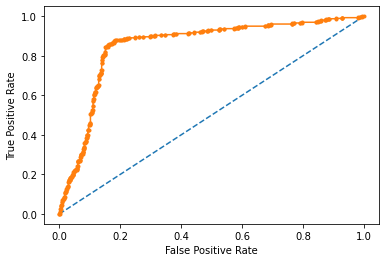

In [175]:
from sklearn import metrics
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df1.X6,glm4.predict(
df1.drop('X6',axis=1)))
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
print('Area Under the Curve', round(metrics.auc(fpr,tpr),4))
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

<AxesSubplot:xlabel='X6', ylabel='count'>

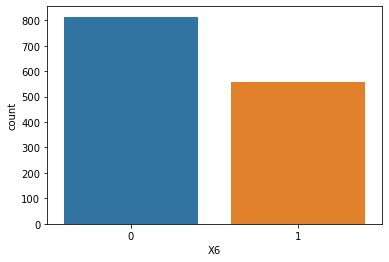

In [181]:
sns.countplot(x='X6', data=df1)

In [184]:
(180+200)/(180+200+2300+820)

0.10857142857142857

In [185]:
1-0.10857142857142857

0.8914285714285715

In [188]:
-8.5 + (0.2*50) + (0.15*0)

1.5

In [187]:
(1.5)/(1+1.5)

0.6

In [190]:
np.exp(1.5)/(1+np.exp(1.5))

0.8175744761936437

In [193]:
390/430

0.9069767441860465